This program is based on the kaggle phishing dataset https://www.kaggle.com/shashwatwork/phishing-dataset-for-machine-learning/

More information about the dataset can be found at https://arxiv.org/ftp/arxiv/papers/1608/1608.02196.pdf 

In [ ]:
!pip install sklearn

In [1]:
#Import Dataset
import pandas as pd
from google.colab import drive
import os
import csv
drive.mount('/content/drive', force_remount=True)
import sklearn
import numpy as np
import tempfile
import os
from collections import defaultdict

file_path = os.path.join(os.getcwd(), "drive", "My Drive", "Phishing_Detector") # replace based on your Google drive organization
print(os.listdir(file_path)[:1])

def read_txt(fname):
  with open(fname) as open_article:
    lines = open_article.read()
  return lines

def read_csv(fname):
  return pd.read_csv(fname)
article_file = "Phishing_Legitimate_full.csv"
article_file = os.path.join(file_path, article_file)
dataset = read_csv(article_file)





Mounted at /content/drive
['Phishing_Legitimate_full.csv']


>1 0.931 (0.010)
>2 0.939 (0.010)
>3 0.945 (0.008)
>4 0.956 (0.007)
>5 0.963 (0.007)
>6 0.967 (0.007)
>7 0.971 (0.007)
>None 0.984 (0.004)


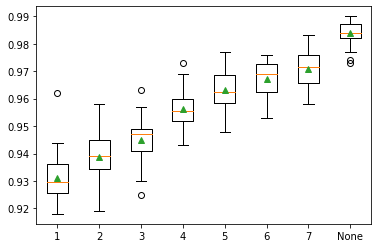

In [3]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 

from tqdm import tnrange, tqdm_notebook
from time import sleep
import warnings
warnings.filterwarnings('ignore')

#Create Logistic Regression Classifier
feature_string = "NumDots	SubdomainLevel	PathLevel	UrlLength	NumDash	NumDashInHostname	AtSymbol	TildeSymbol	NumUnderscore	NumPercent	NumQueryComponents	NumAmpersand	NumHash	NumNumericChars	NoHttps	RandomString	IpAddress	DomainInSubdomains	DomainInPaths	HttpsInHostname	HostnameLength	PathLength	QueryLength	DoubleSlashInPath	NumSensitiveWords	EmbeddedBrandName	PctExtHyperlinks	PctExtResourceUrls	ExtFavicon	InsecureForms	RelativeFormAction	ExtFormAction	AbnormalFormAction	PctNullSelfRedirectHyperlinks	FrequentDomainNameMismatch	FakeLinkInStatusBar	RightClickDisabled	PopUpWindow	SubmitInfoToEmail	IframeOrFrame	MissingTitle	ImagesOnlyInForm	SubdomainLevelRT	UrlLengthRT	PctExtResourceUrlsRT	AbnormalExtFormActionR	ExtMetaScriptLinkRT	PctExtNullSelfRedirectHyperlinksRT"
f_dic = feature_string.split()
#print(f_dic)

datax = dataset[f_dic]
datay = dataset.CLASS_LABEL

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(datax,datay,test_size=0.3,random_state=0)

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return datax, datay
  #return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()